# Loading the Dataset

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing

In [4]:
df.isnull().sum()


sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [5]:
df['class'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
df["class"] = l.fit_transform(df["class"])
df['class'].value_counts()

2    50
1    50
0    50
Name: class, dtype: int64

# Visualisation

In [7]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

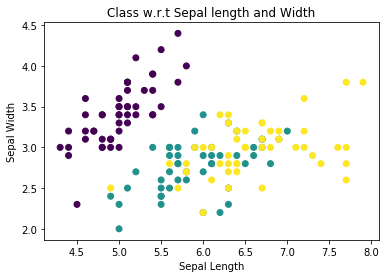

In [8]:
plt.scatter(df['sepal length'] , df['sepal width'] , c = df['class'] , cmap = 'viridis')
plt.xlabel('Sepal Length')
plt.ylabel("Sepal Width")
plt.title ('Class w.r.t Sepal length and Width')
plt.show()

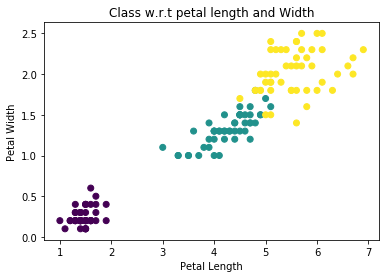

In [9]:
plt.scatter(df['petal length'] , df['petal width'] , c = df['class'] , cmap = 'viridis')
plt.xlabel('Petal Length')
plt.ylabel("Petal Width")
plt.title ('Class w.r.t petal length and Width')
plt.show()

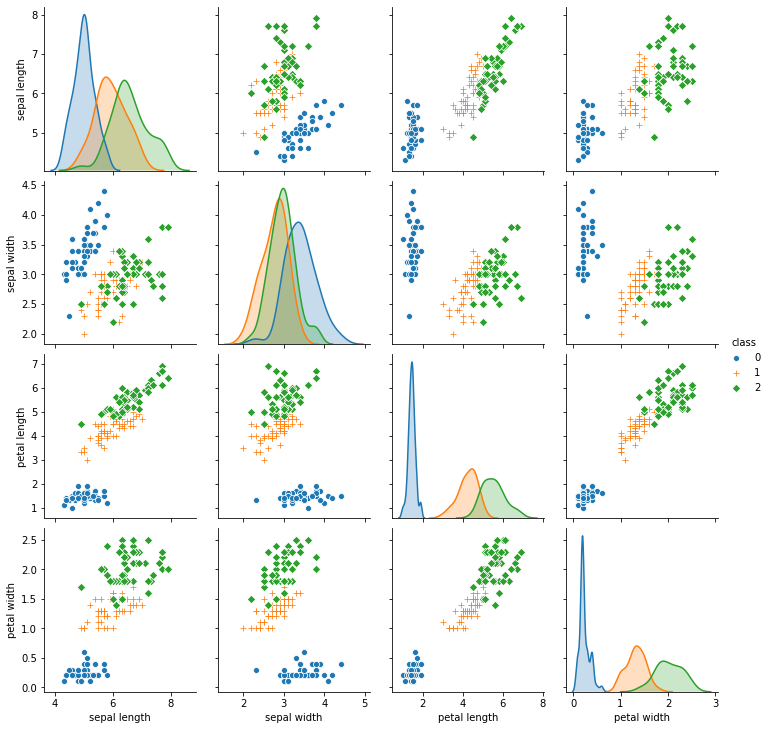

In [10]:
import seaborn as sns
sns.pairplot(df , hue="class", markers=["o", "+", "D"])

# Logistic Regression

In [11]:
X = df.drop(['class'] , axis = 1)
y = df ['class']

In [12]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y= train_test_split(X, y, test_size = 0.20, random_state=3)

In [16]:
test_y.value_counts()

2    10
1    10
0    10
Name: class, dtype: int64

In [13]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x , train_y )

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(confusion_matrix(lr.predict(train_x) , train_y))
print(accuracy_score(lr.predict(train_x) , train_y))

[[40  0  0]
 [ 0 37  1]
 [ 0  3 39]]
0.9666666666666667


In [15]:
print(confusion_matrix(lr.predict(test_x) , test_y))
print(accuracy_score(lr.predict(test_x) , test_y))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
1.0


# KNN Classification

In [17]:
from sklearn.neighbors import KNeighborsClassifier

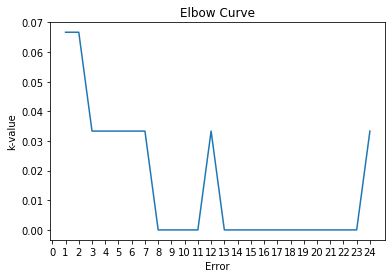

In [33]:
error = []
for i in range(1 , 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x , train_y)
    x =1 -  accuracy_score(knn.predict(test_x) , test_y)
    error.append(x)
    
plt.plot(range(1 ,25) , error)
plt.xlabel('Error')
plt.ylabel('k-value')
plt.title('Elbow Curve')
plt.xticks(range(25))
plt.show()

In [34]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(train_x , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [35]:
print(confusion_matrix(knn.predict(train_x) , train_y))
print(accuracy_score(knn.predict(train_x) , train_y))

[[40  0  0]
 [ 0 38  2]
 [ 0  2 38]]
0.9666666666666667


In [36]:
print(confusion_matrix(knn.predict(test_x) , test_y))
print(accuracy_score(knn.predict(test_x) , test_y))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
1.0
